# MOVIE GENRE CLASSIFICATION

This project aims to develop a machine learning model to classify movies into genres. By analyzing historical film data, we aim to streamline genre assignment and enhance user movie recommendations, making the viewing experience more personalized and efficient.

# E.D.A

## Overview Stage

* Read the csv
* Look for basic information about the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
path_train_data = "/content/drive/MyDrive/Task 1_Movie genre classification/Dataset/Genre Classification Dataset/train_data.txt"
path_test_data = "/content/drive/MyDrive/Task 1_Movie genre classification/Dataset/Genre Classification Dataset/test_data.txt"

In [4]:
train_data = pd.read_csv(path_train_data, delimiter = ":::", header = None)
train_data.head()

<ipython-input-4-1de96771077c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(path_train_data, delimiter = ":::", header = None)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
test_data = pd.read_csv(path_test_data, delimiter = ":::", header = None)
test_data.head()

<ipython-input-5-c554ce039d27>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(path_test_data, delimiter = ":::", header = None)


,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
df = train_data

In [7]:
df.shape

(54214, 4)

In [8]:
df.info

<bound method DataFrame.info of            0                                             1              2  \
0          1                 Oscar et la dame rose (2009)          drama    
1          2                                 Cupid (1997)       thriller    
2          3             Young, Wild and Wonderful (1980)          adult    
3          4                        The Secret Sin (1915)          drama    
4          5                       The Unrecovered (2007)          drama    
...      ...                                           ...            ...   
54209  54210                              "Bonino" (1953)         comedy    
54210  54211                  Dead Girls Don't Cry (????)         horror    
54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212  54213                     Make Your Own Bed (1944)         comedy    
54213  54214   Nature's Fury: Storm of the Century (2006)        history    

                                           

In [9]:
df.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


# Data Cleaning

In [10]:
df.drop(columns = [0, 1], inplace = True)
df.head()

,2,3
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [11]:
# Rename the two columns
df.rename(columns = {2 : "target", 3 : "description"}, inplace = True)
df.head()

,target,description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


## Checking missing values

In [12]:
import numpy as np

In [13]:
df.isnull().sum()

target         0
description    0
dtype: int64

* We have to deal with all possible version of (-1)

In [14]:
df.replace('-1', np.nan, inplace = True)

In [15]:
df.replace(-1, np.nan, inplace = True)

In [16]:
df.replace(-1.0, np.nan, inplace = True)

In [17]:
df.isnull().sum()

target         0
description    0
dtype: int64

* No missing values found in the dataset

### Checking for duplicate values

In [18]:
df.duplicated().sum()

109

In [19]:
df = df.drop_duplicates(keep = "first")

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(54105, 2)

## Checking for noise in text data

* Checking if there is HTML tags in description

In [22]:
import re

In [23]:
df.iloc[0]["description"]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [24]:

html_tag_pattern = re.compile(r'<[^>]+>')


for index, row in df.iterrows():
    description = row['description']


    html_tags = html_tag_pattern.search(description)



    if html_tags:
        print(f"Row {index}: HTML tags found in the description: {html_tags.group()}")

    else:
        print(f"Row {index}: Description is clean and contains no  HTML tags.")



Streaming output truncated to the last 5000 lines.
Row 49191: Description is clean and contains no  HTML tags.
Row 49192: Description is clean and contains no  HTML tags.
Row 49193: Description is clean and contains no  HTML tags.
Row 49194: Description is clean and contains no  HTML tags.
Row 49195: Description is clean and contains no  HTML tags.
Row 49196: Description is clean and contains no  HTML tags.
Row 49197: Description is clean and contains no  HTML tags.
Row 49198: Description is clean and contains no  HTML tags.
Row 49199: Description is clean and contains no  HTML tags.
Row 49200: Description is clean and contains no  HTML tags.
Row 49201: Description is clean and contains no  HTML tags.
Row 49202: Description is clean and contains no  HTML tags.
Row 49203: Description is clean and contains no  HTML tags.
Row 49204: Description is clean and contains no  HTML tags.
Row 49205: Description is clean and contains no  HTML tags.
Row 49206: Description is clean and contains no  

* It seems there are no  HTML tags in the description.

## Data Exploration and Descriptive Statistics

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


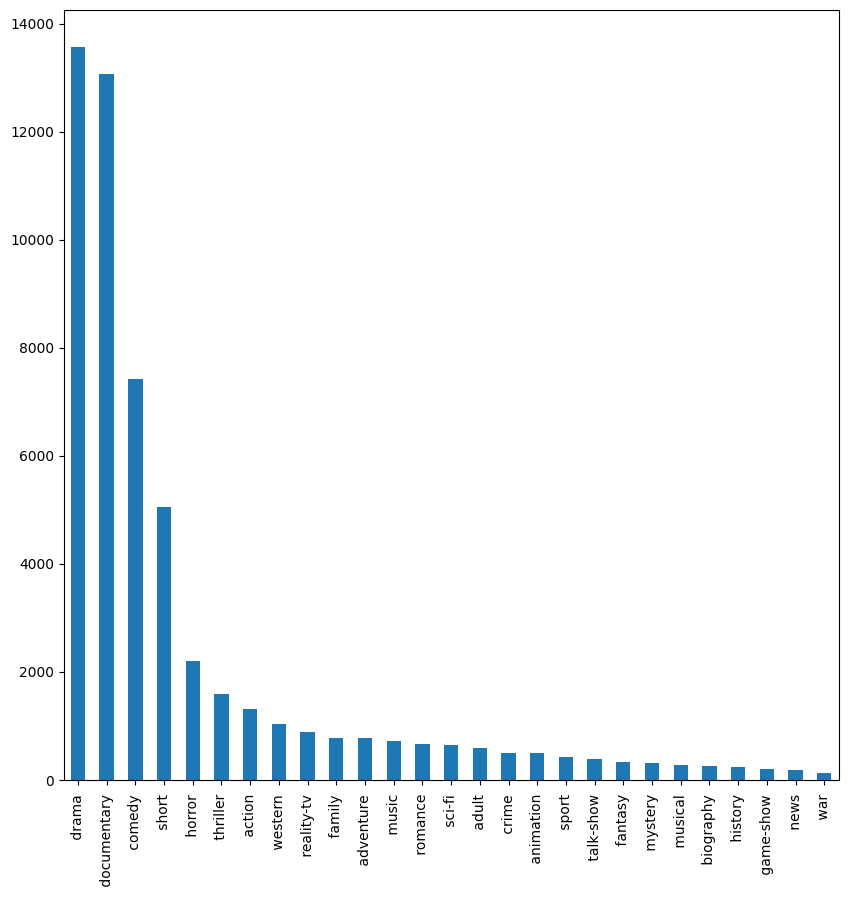

In [26]:
df["target"].value_counts().plot(kind='bar', figsize=(10,10));

In [27]:
# Number of class in the dataset
df['target'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

## Data Preparation

In [28]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['target'] = class_le.fit_transform(df['target'].values)

<ipython-input-28-3d275f1aa356>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = class_le.fit_transform(df['target'].values)


In [29]:
df.head()

,target,description
0,8,Listening in to a conversation between his do...
1,24,A brother and sister with a past incestuous r...
2,1,As the bus empties the students for their fie...
3,8,To help their unemployed father make ends mee...
4,8,The film's title refers not only to the un-re...


In [30]:
import string
punct = string.punctuation
def remove_punctuation(text_sentence):
    text = "".join([word for word in text_sentence if word not in punct])
    return text
df['description'] = df['description'].apply(lambda x: remove_punctuation(x))
df.head()

<ipython-input-30-f9a4e4b9fe20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(lambda x: remove_punctuation(x))


,target,description
0,8,Listening in to a conversation between his do...
1,24,A brother and sister with a past incestuous r...
2,1,As the bus empties the students for their fie...
3,8,To help their unemployed father make ends mee...
4,8,The films title refers not only to the unreco...


In [31]:
import re
def tokenize(text_sentence):
    token = re.split('\W+', text_sentence)
    return token
df['description'] = df['description'].apply(lambda x: tokenize(x))
df.head()

<ipython-input-31-9d6465df592c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(lambda x: tokenize(x))


,target,description
0,8,"[, Listening, in, to, a, conversation, between..."
1,24,"[, A, brother, and, sister, with, a, past, inc..."
2,1,"[, As, the, bus, empties, the, students, for, ..."
3,8,"[, To, help, their, unemployed, father, make, ..."
4,8,"[, The, films, title, refers, not, only, to, t..."


In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
import pandas as pd
from nltk.corpus import stopwords

# Load stopwords for English
stopwords = set(stopwords.words('english'))

def remove_stopword(text_sentence):
    text = [word for word in text_sentence if word not in stopwords]
    return text

# Assuming df is your DataFrame
df['description'] = df['description'].apply(lambda x: remove_stopword(x))
df.head()


<ipython-input-33-537b26a4802f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(lambda x: remove_stopword(x))


,target,description
0,8,"[, Listening, conversation, doctor, parents, 1..."
1,24,"[, A, brother, sister, past, incestuous, relat..."
2,1,"[, As, bus, empties, students, field, trip, Mu..."
3,8,"[, To, help, unemployed, father, make, ends, m..."
4,8,"[, The, films, title, refers, unrecovered, bod..."


In [34]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Download the WordNet dataset if not already downloaded

wm = WordNetLemmatizer()

def lemmatize(text_sentence):
    text = [wm.lemmatize(word) for word in text_sentence]
    return text

# Assuming df is your DataFrame
df['description'] = df['description'].apply(lambda x: lemmatize(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-34-1dc3b3e2b165>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(lambda x: lemmatize(x))


,target,description
0,8,"[, Listening, conversation, doctor, parent, 10..."
1,24,"[, A, brother, sister, past, incestuous, relat..."
2,1,"[, As, bus, empty, student, field, trip, Museu..."
3,8,"[, To, help, unemployed, father, make, end, me..."
4,8,"[, The, film, title, refers, unrecovered, body..."


In [35]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')  # Download the Punkt tokenizer if not already downloaded
nltk.download('wordnet')  # Download the WordNet dataset if not already downloaded

wm = WordNetLemmatizer()

def remove_punctuation_and_join(text_sentence):
    if isinstance(text_sentence, list):  # Check if the input is a list
        # Remove punctuation and lemmatize each word
        lemmatized_words = [wm.lemmatize(word) for word in text_sentence if word not in string.punctuation]
        # Join the lemmatized words into a single string
        joined_text = ' '.join(lemmatized_words)
        return joined_text
    else:
        return ''  # Return an empty string for non-list values

# Assuming df is your DataFrame
df['description'] = df['description'].apply(lambda x: remove_punctuation_and_join(x))
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-35-8edb69db10a1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].apply(lambda x: remove_punctuation_and_join(x))


,target,description
0,8,Listening conversation doctor parent 10yearold...
1,24,A brother sister past incestuous relationship ...
2,1,As bus empty student field trip Museum Natural...
3,8,To help unemployed father make end meet Edith ...
4,8,The film title refers unrecovered body ground ...


In [36]:
X = df['description'].values
y = df['target'].values

In [37]:
X

array(['Listening conversation doctor parent 10yearold Oscar learns nobody courage tell He week live Furious refuse speak anyone except straighttalking Rose lady pink meet hospital stair As Christmas approach Rose u fantastical experience professional wrestler imagination wit charm allow Oscar live life love full company friend Pop Corn Einstein Bacon childhood sweetheart Peggy Blue',
       'A brother sister past incestuous relationship current murderous relationship He murder woman reject murder woman get close',
       'As bus empty student field trip Museum Natural History little tour guide suspect student another tour First lecture film coeds drift dream erotic fantasy one imagine After film release emotion fantasy erotic uncommon way One slip curator office little acquisition Another find anthropologist see bone identified Even head teacher isnt immune Soon tour bus departs everyone admits quite education',
       ...,
       'Ze bestaan echt standup comedy growing facing fear Fr

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,
                                                 random_state=2,
                                                stratify = y)

In [39]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())
maxLen

1480

In [40]:
def read_glove_vecs1(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:  # Specify the encoding as 'utf-8'
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)

        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map


word_to_index, index_to_word, word_to_vec_map = read_glove_vecs1('/content/drive/MyDrive/Task 1_Movie genre classification/Explore/data/glove.6B.50d.txt')

In [41]:
def sentences_to_indices(X, word_to_index, max_len):

    m = X.shape[0]

    X_indices = np.zeros((m, max_len))

    for i in range(m):
        sentence_words = X[i].lower().split()

        j = 0

        for w in sentence_words:
            if w in word_to_index:
                X_indices[i, j] = word_to_index[w]
                j = j + 1
    return X_indices

In [42]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):

    vocab_size = len(word_to_index) + 1
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]

    emb_matrix = np.zeros((vocab_size, emb_dim))

    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]

    embedding_layer = Embedding(vocab_size, emb_dim, trainable = False)
    embedding_layer.build((None,))

    embedding_layer.set_weights([emb_matrix])
    return embedding_layer

In [43]:
import pandas as pd
import numpy as np

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import nltk

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Bidirectional

from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

In [44]:
def Network(input_shape, word_to_vec_map, word_to_index):

    sentence_indices = Input(input_shape,dtype='int32')

    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)

    embeddings = embedding_layer(sentence_indices)

    X = LSTM(85,return_sequences=True)(embeddings)
    X =  Dropout(0.5 )(X)

    X = LSTM(50,return_sequences=False)(X)

    X =  Dropout(0.5 )(X)
    X = Dense(27)(X)

    X = Activation('softmax')(X)

    model = Model(sentence_indices,X)

    return model

from keras.layers import Input, LSTM, Bidirectional, Dropout, Dense, Activation, Attention, concatenate, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

def updated_network(input_shape, word_to_vec_map, word_to_index):

    sentence_indices = Input(input_shape, dtype='int32')

    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)

    # Bidirectional LSTM with attention
    X = Bidirectional(LSTM(85, return_sequences=True))(embeddings)
    X = Attention()([X, X])

    # Additional Bidirectional LSTM layer
    X = Bidirectional(LSTM(50, return_sequences=True))(X)

    # Regularization and Batch Normalization
    X = Dropout(0.5)(X)
    X = Bidirectional(LSTM(25, return_sequences=False, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))(X)
    X = BatchNormalization()(X)

    # Concatenate previous LSTM output with the original Bidirectional LSTM output
    X_concat = concatenate([X, embeddings[:, -1, :]])

    # Dense layer with regularization
    X = Dense(27, kernel_regularizer=l2(0.01))(X_concat)
    X = BatchNormalization()(X)

    # Softmax activation
    X = Activation('softmax')(X)

    model = Model(sentence_indices, X)

    return model


In [45]:
model = updated_network((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1480)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1480, 50)             2000005   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 bidirectional (Bidirection  (None, 1480, 170)            92480     ['embedding[0][0]']           
 al)                                                                                              
                                                                                              

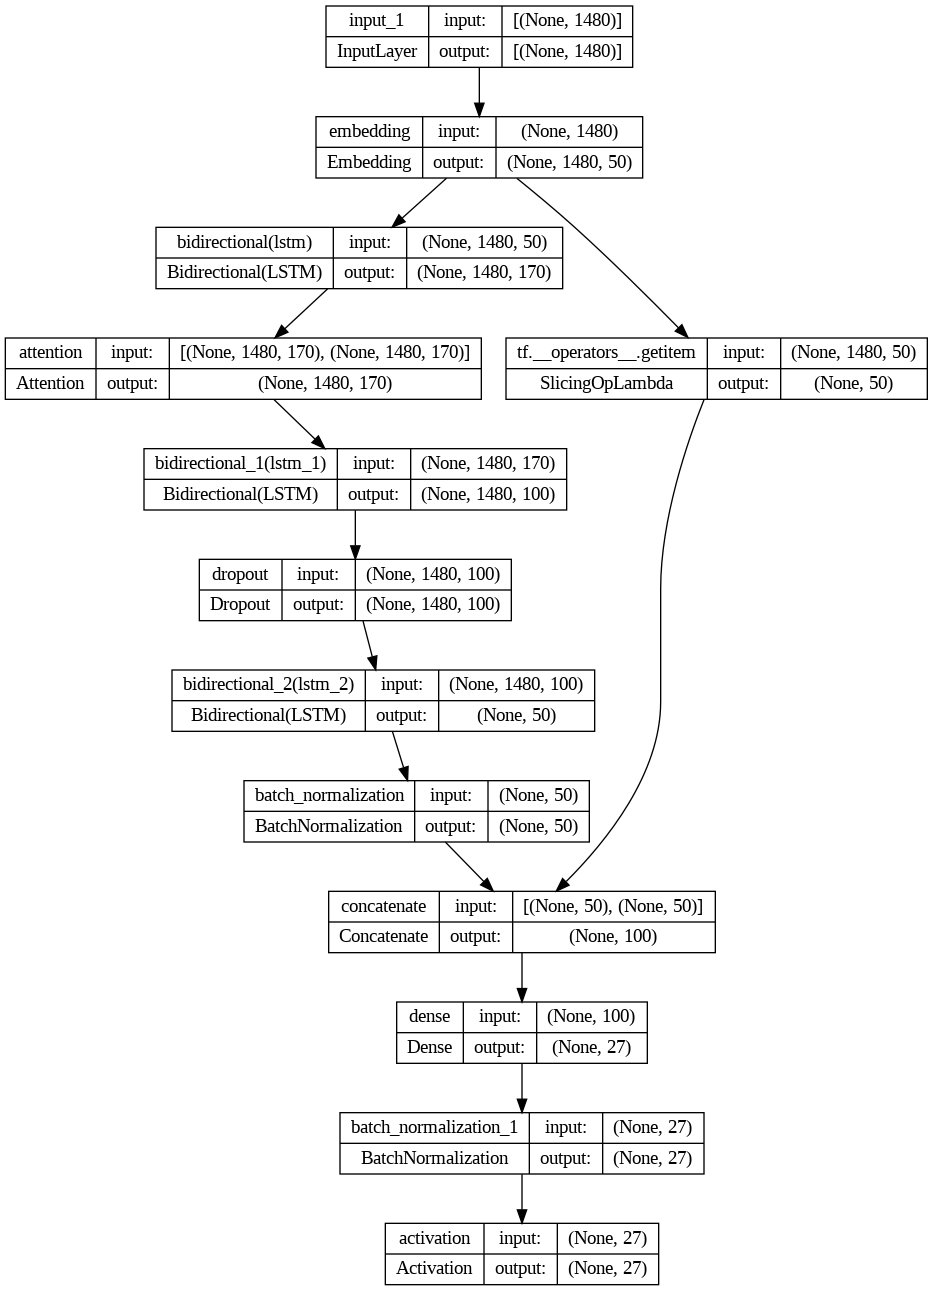

In [46]:
from tensorflow.keras.utils import  plot_model

plot_model(model, show_shapes = True)

In [47]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy'],
              )

In [48]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y


X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(y_train, C = 27)

X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
Y_test_oh = convert_to_one_hot(y_test, C = 27)

In [49]:
Y_train_oh[0].shape

(27,)

In [53]:

history = model.fit(X_train_indices, Y_train_oh,
                    epochs = 10, batch_size = 64,
                    validation_data=(X_test_indices, Y_test_oh))


Epoch 1/10
677/677 [==============================] - 297s 439ms/step - loss: 0.8944 - accuracy: 0.7380 - val_loss: 1.6544 - val_accuracy: 0.5573
Epoch 2/10
677/677 [==============================] - 300s 443ms/step - loss: 0.8596 - accuracy: 0.7481 - val_loss: 1.7585 - val_accuracy: 0.5441
Epoch 3/10
677/677 [==============================] - 299s 442ms/step - loss: 0.9524 - accuracy: 0.7219 - val_loss: 1.6834 - val_accuracy: 0.5377
Epoch 4/10
677/677 [==============================] - 299s 441ms/step - loss: 0.9893 - accuracy: 0.7049 - val_loss: 1.7083 - val_accuracy: 0.5450
Epoch 5/10
677/677 [==============================] - 297s 438ms/step - loss: 0.9147 - accuracy: 0.7298 - val_loss: 1.6854 - val_accuracy: 0.5449
Epoch 6/10
677/677 [==============================] - 299s 442ms/step - loss: 1.0824 - accuracy: 0.6762 - val_loss: 1.6219 - val_accuracy: 0.5457
Epoch 7/10
677/677 [==============================] - 300s 444ms/step - loss: 1.0316 - accuracy: 0.6877 - val_loss: 1.6527 -

In [51]:
#pd.DataFrame(history.history).plot()